# ANÁLISIS EXPLORATORIO

Realizamos EDA con el Dataset_1, al que no se le ha eliminado tableros negros en 2022, u outro tipo de casuística que se estudia aquí.

Importación de librerías y datos.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('../Datasets/Dataset_2.csv',index_col='fecha')
df = df.sort_index()
df.index = pd.to_datetime(df.index)

In [3]:
df.columns

Index(['FormacionNIRHumedadPV', 'FibraticPredNIRHumedadPV', 'Hum_Pred',
       'Etapa2MWHumedadPV', 'ExtractorVelocidadPV', 'FormacionAlturaMantaPV',
       'FormadoraVelocidadPV', 'FormadoraSiloNivel', 'SiloFibraNivel',
       'SiloFibraVelocidadPV', 'SiloRechazosNivelPV',
       'SiloRechazosVelocidadPV', 'SierrasAnchoPV', 'ScalperPosPV',
       'ScalperReservaMediaPV', 'ScalperReservaDerPosPV',
       'ScalperReservaIzqPosPV', 'FormacionNIRPH', 'FormacionNIRHumedadPV_std',
       'FibraticPredNIRHumedadPV_std', 'Hum_Pred_std', 'Etapa2MWHumedadPV_std',
       'Negro', 'CurvaCola', 'Congelado', 'Hum'],
      dtype='object')

In [4]:
df['Anomalia'] = df['Negro'] + df['CurvaCola'] + df['Congelado'] + df['Hum']
df['Anomalia'] = df['Anomalia'].map(lambda x: 1 if x!=0 else 0)

df0 = df[df['Anomalia'] == 0]
df_Negro = df[df['Negro'] > 0]
df_CurvaCola = df[df['CurvaCola'] == 0]
df_Congelado = df[df['Congelado'] == 0]
df_Hum = df[df['Hum'] == 0]
df_Anomalia = df[df['Anomalia'] > 0]

borrar_columnas = ['Negro', 'CurvaCola', 'Congelado', 'Hum', 'Anomalia']

df0 = df0.drop(borrar_columnas,axis=1)
df_Negro = df_Negro.drop(borrar_columnas,axis=1)
df_CurvaCola = df_CurvaCola.drop(borrar_columnas,axis=1)
df_Congelado = df_Congelado.drop(borrar_columnas,axis=1)
df_Hum = df_Hum.drop(borrar_columnas,axis=1)
df_Anomalia = df_Anomalia.drop(borrar_columnas,axis=1)

## Proporción de cada anomalía

In [5]:
def proporciones(df,columna):
    return round(df[df[columna]==1][columna].count()/df[columna].count() *100,2)

lista_proporciones = []
lista_anomalias = ['Anomalia','Negro','CurvaCola', 'Congelado', 'Hum']

for i in lista_anomalias:
    lista_proporciones.append(proporciones(df,i))


df_proporciones = np.array(lista_proporciones)
df_proporciones = pd.DataFrame(df_proporciones).T
df_proporciones.columns = lista_anomalias

print('Proporción de anomalías en %: ')
df_proporciones.head()

Proporción de anomalías en %: 


,Anomalia,Negro,CurvaCola,Congelado,Hum
0,16.69,6.65,9.17,6.33,0.55


## Análisis multivariable

Leemos las variables de las que disponemos e imprimos el principio y final del dataset.

In [6]:
columnas_iniciales = df0.columns.values
columnas_iniciales

array(['FormacionNIRHumedadPV', 'FibraticPredNIRHumedadPV', 'Hum_Pred',
       'Etapa2MWHumedadPV', 'ExtractorVelocidadPV',
       'FormacionAlturaMantaPV', 'FormadoraVelocidadPV',
       'FormadoraSiloNivel', 'SiloFibraNivel', 'SiloFibraVelocidadPV',
       'SiloRechazosNivelPV', 'SiloRechazosVelocidadPV', 'SierrasAnchoPV',
       'ScalperPosPV', 'ScalperReservaMediaPV', 'ScalperReservaDerPosPV',
       'ScalperReservaIzqPosPV', 'FormacionNIRPH',
       'FormacionNIRHumedadPV_std', 'FibraticPredNIRHumedadPV_std',
       'Hum_Pred_std', 'Etapa2MWHumedadPV_std'], dtype=object)

C:\Users\marco\AppData\Local\Temp\ipykernel_6780\869127671.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


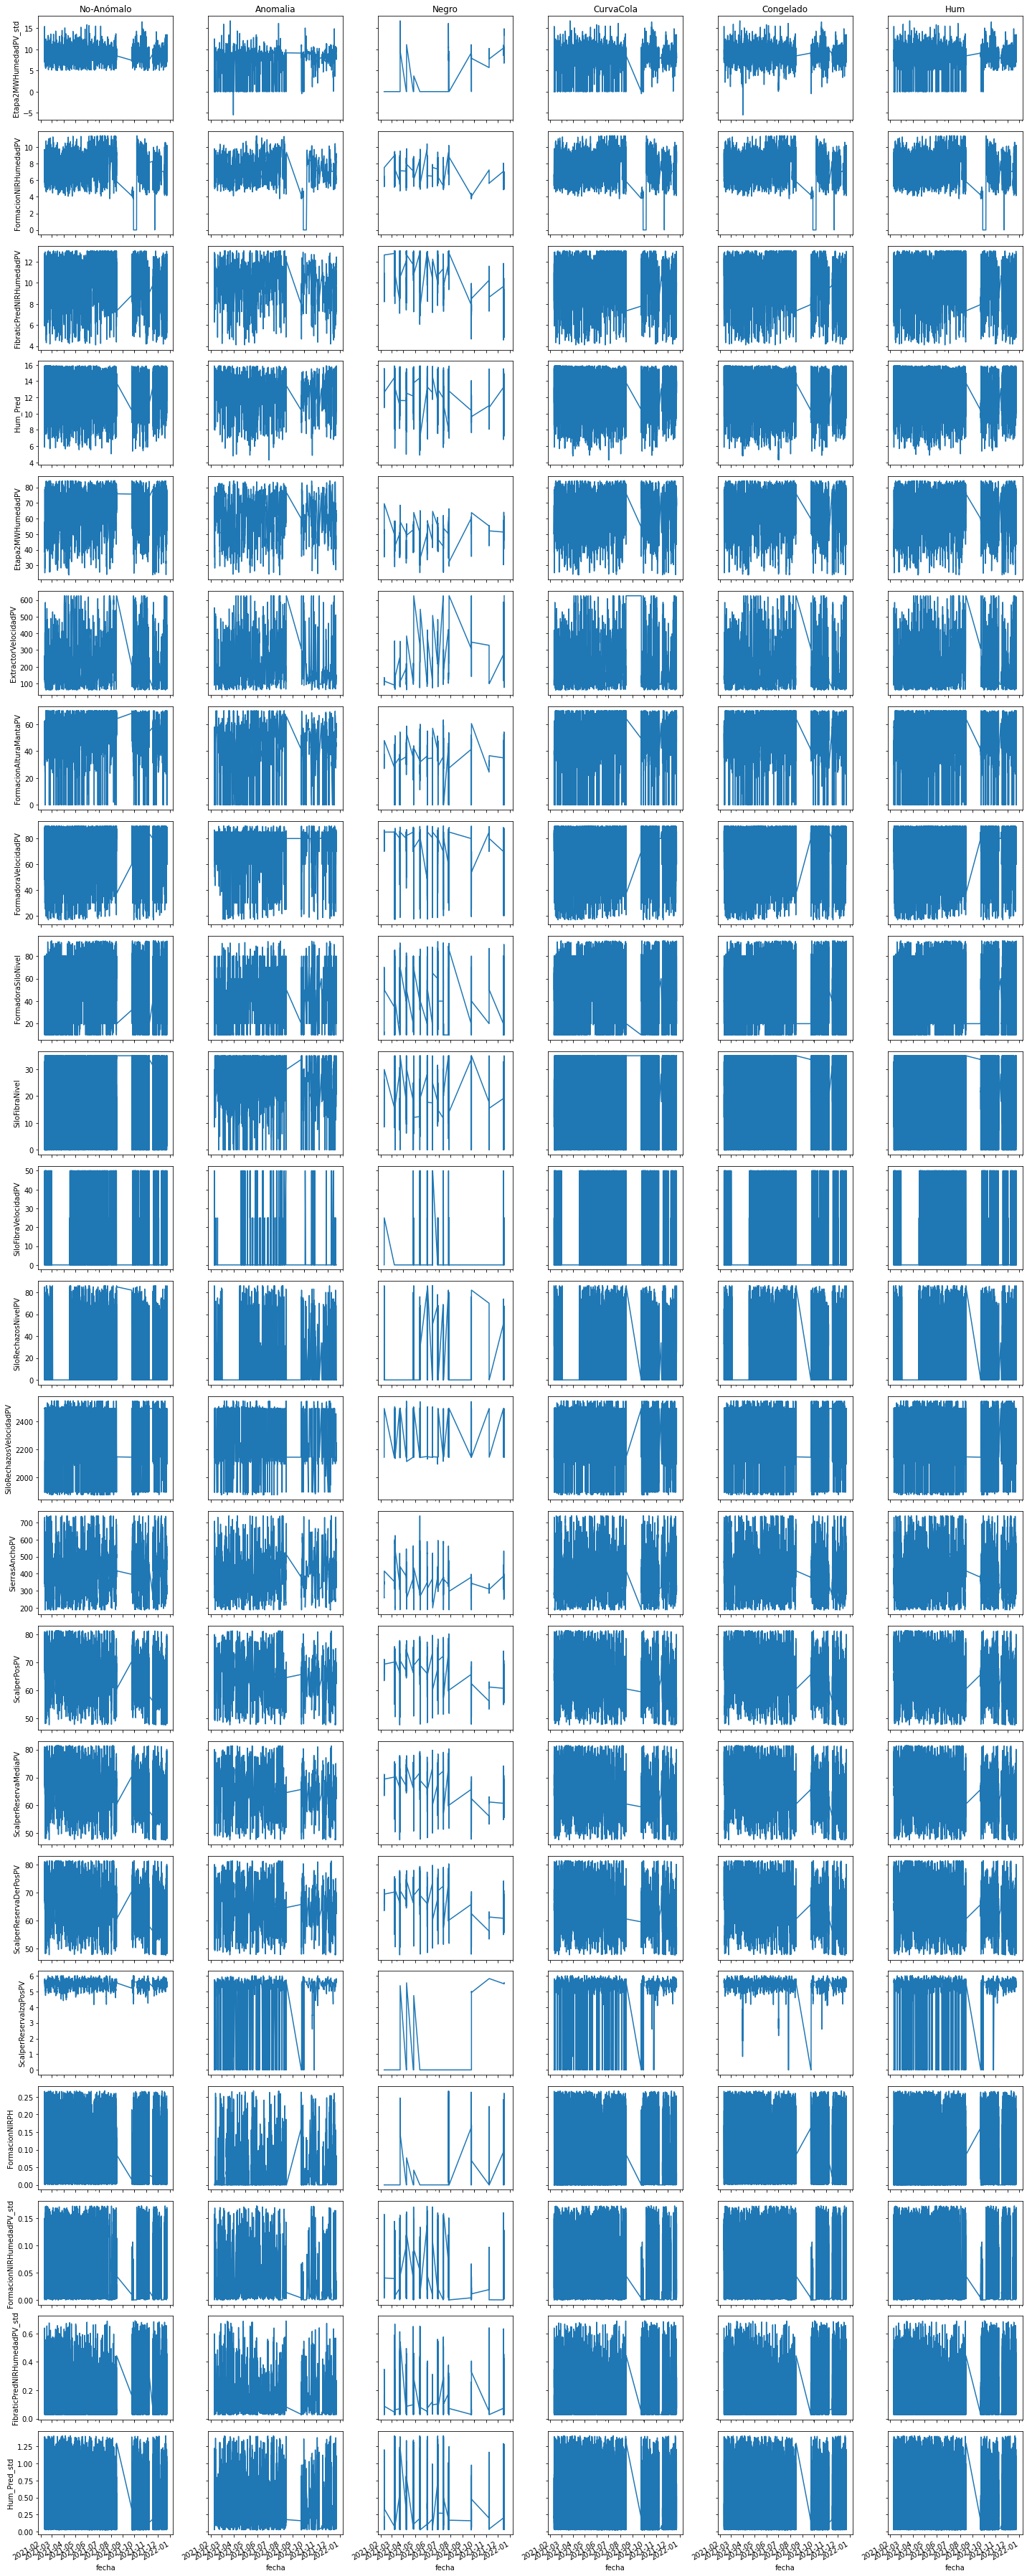

In [7]:
date_form = DateFormatter("%b")
fig,ax = plt.subplots(nrows = len(columnas_iniciales), ncols = len(lista_anomalias)+1, figsize=(20,50), sharey='row', sharex='row')

ax[0,0].set_title('No-Anómalo')
for i in range(len(lista_anomalias)):
    ax[0,i+1].set_title(lista_anomalias[i])

for i in range(len(columnas_iniciales)):
    df0.iloc[:,i].plot(ax=ax[i,0])
    df_Anomalia.iloc[:,i].plot(ax=ax[i,1])
    df_Negro.iloc[:,i].plot(ax=ax[i,2])
    df_CurvaCola.iloc[:,i].plot(ax=ax[i,3])
    df_Congelado.iloc[:,i].plot(ax=ax[i,4])
    df_Hum.iloc[:,i].plot(ax=ax[i,5])

    ax[i,0].set_ylabel(columnas_iniciales[i-1])

fig.tight_layout()
fig.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_6780\2419549732.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


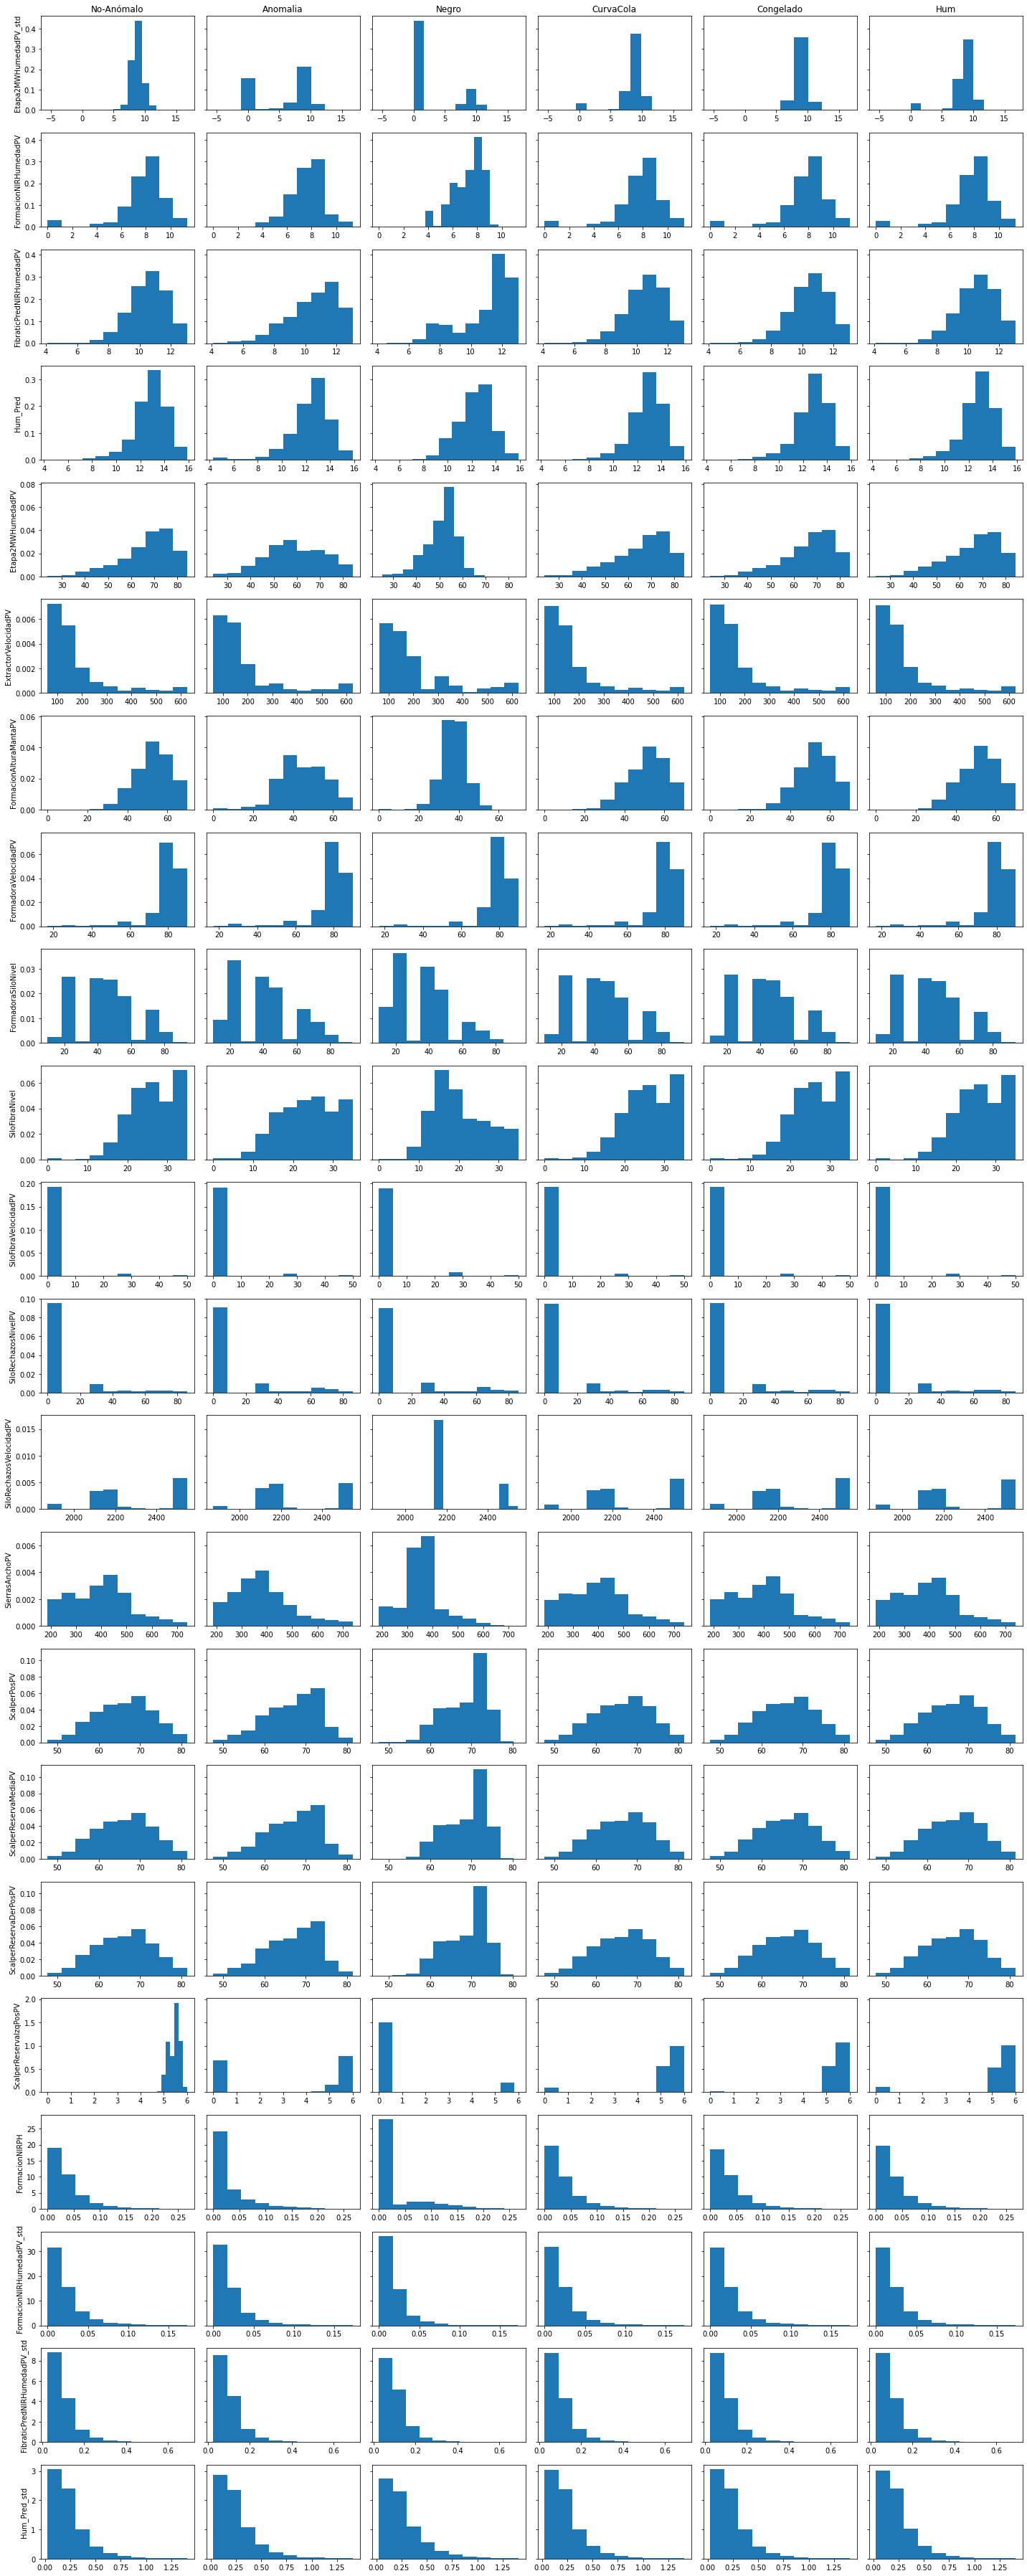

In [8]:
date_form = DateFormatter("%b")
fig,ax = plt.subplots(nrows = len(columnas_iniciales), ncols = len(lista_anomalias)+1, figsize=(20,50), sharey='row', sharex='row')

ax[0,0].set_title('No-Anómalo')
for i in range(len(lista_anomalias)):
    ax[0,i+1].set_title(lista_anomalias[i])

for i in range(len(columnas_iniciales)):
    df0.iloc[:,i].hist(ax=ax[i,0], grid=False, density=1)
    df_Anomalia.iloc[:,i].hist(ax=ax[i,1], grid=False, density=1)
    df_Negro.iloc[:,i].hist(ax=ax[i,2], grid=False, density=1)
    df_CurvaCola.iloc[:,i].hist(ax=ax[i,3], grid=False, density=1)
    df_Congelado.iloc[:,i].hist(ax=ax[i,4], grid=False, density=1)
    df_Hum.iloc[:,i].hist(ax=ax[i,5], grid=False, density=1)

    ax[i,0].set_ylabel(columnas_iniciales[i-1])

fig.tight_layout()
fig.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_6780\3304830364.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


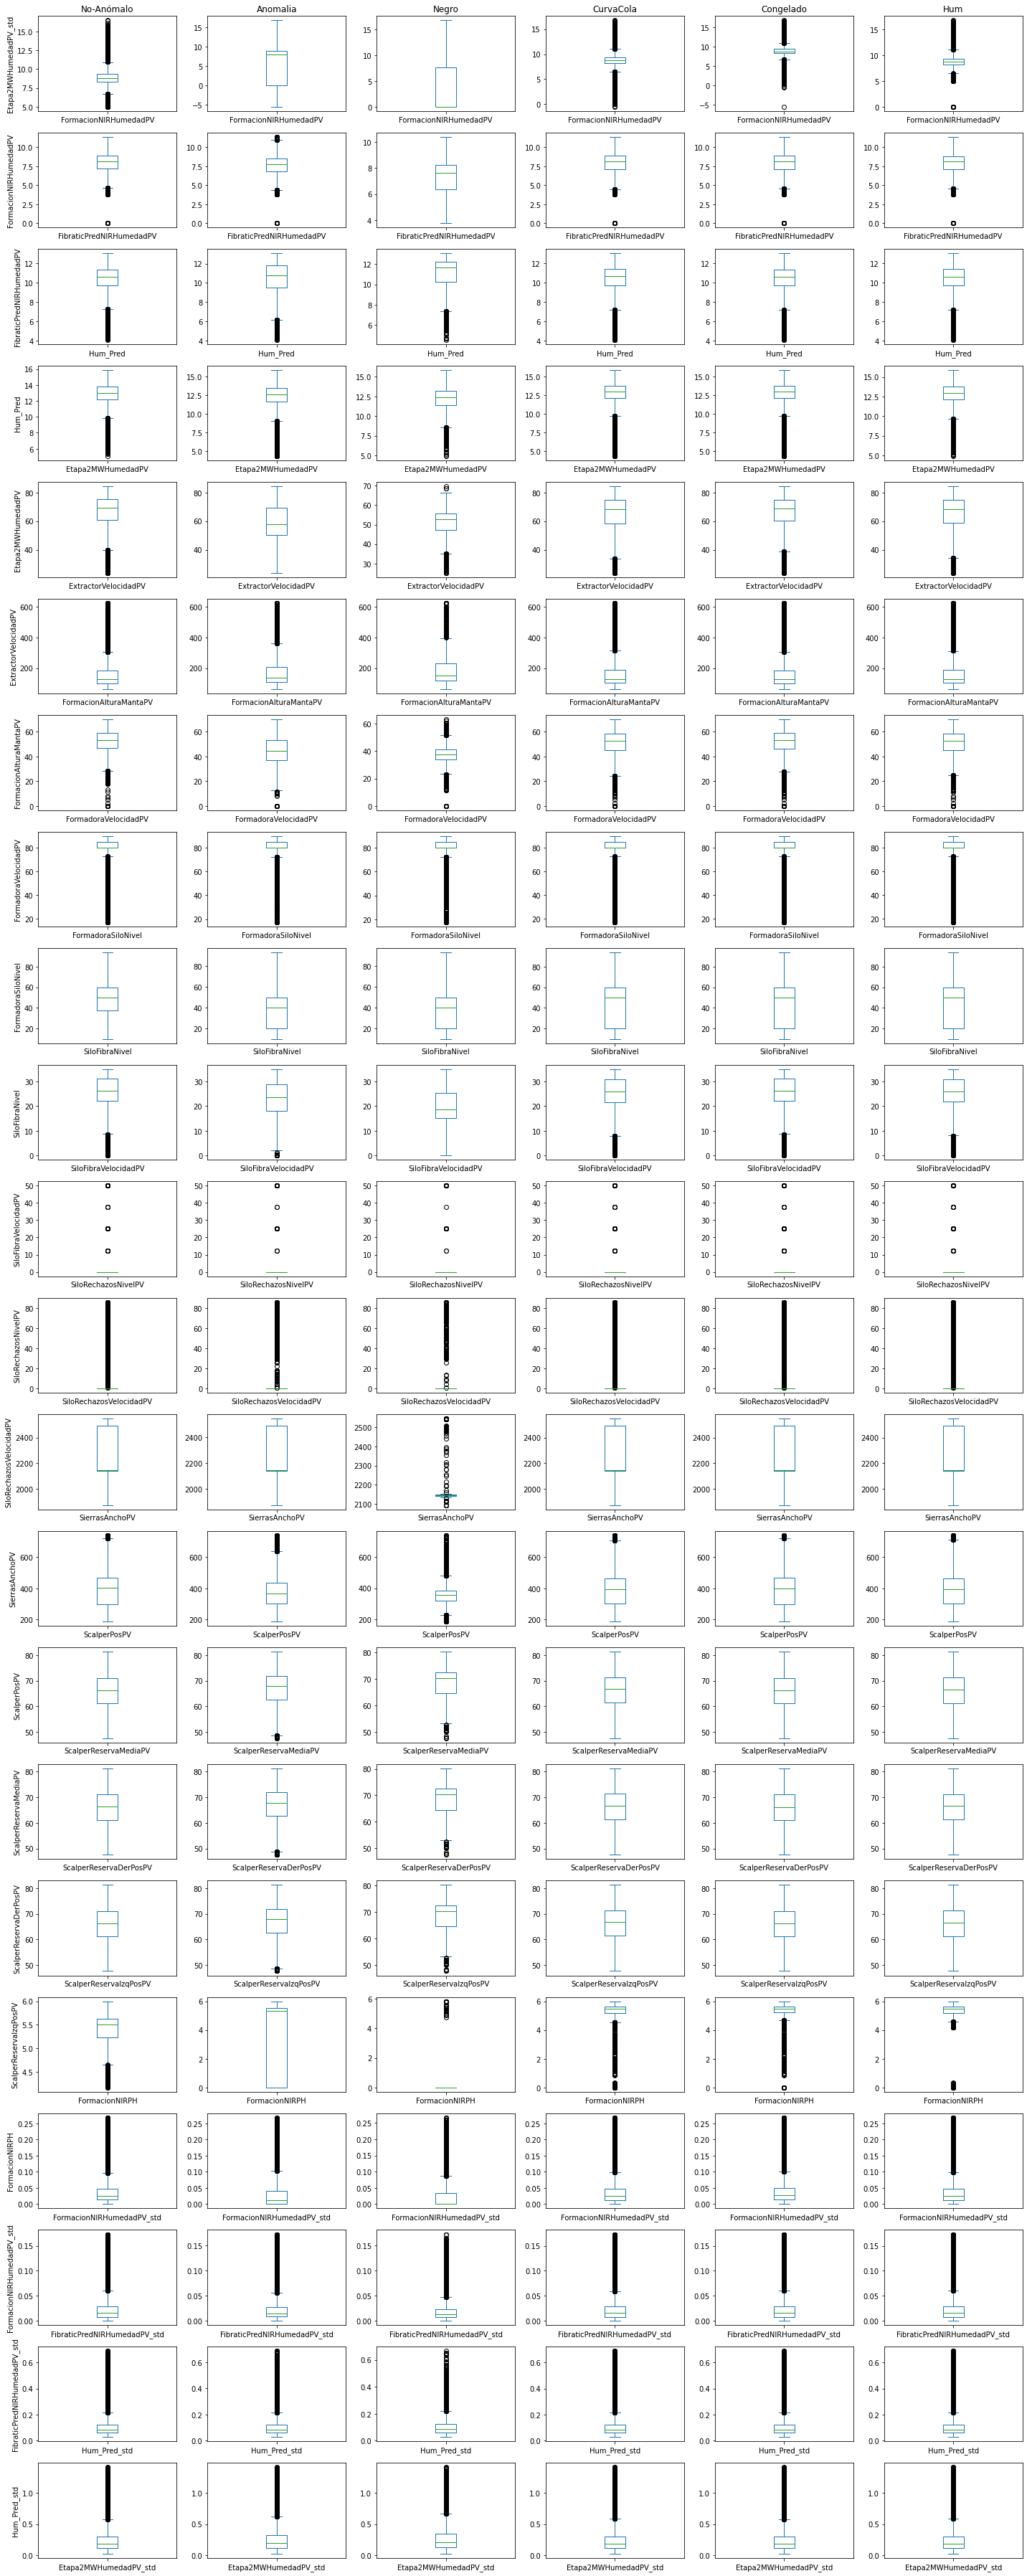

In [9]:
date_form = DateFormatter("%b")
fig,ax = plt.subplots(nrows = len(columnas_iniciales), ncols = len(lista_anomalias)+1, figsize=(20,50))

ax[0,0].set_title('No-Anómalo')
for i in range(len(lista_anomalias)):
    ax[0,i+1].set_title(lista_anomalias[i])

for i in range(len(columnas_iniciales)):
    df0.iloc[:,i].plot.box(ax=ax[i,0], grid=False)
    df_Anomalia.iloc[:,i].plot.box(ax=ax[i,1], grid=False)
    df_Negro.iloc[:,i].plot.box(ax=ax[i,2], grid=False)
    df_CurvaCola.iloc[:,i].plot.box(ax=ax[i,3], grid=False)
    df_Congelado.iloc[:,i].plot.box(ax=ax[i,4], grid=False)
    df_Hum.iloc[:,i].plot.box(ax=ax[i,5], grid=False)

    ax[i,0].set_ylabel(columnas_iniciales[i-1])

fig.tight_layout()
fig.show()

ECDF

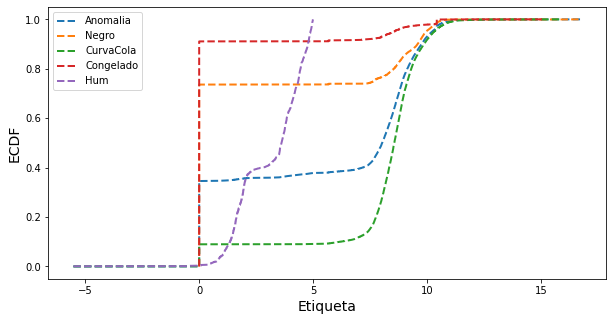

In [10]:
import dc_stat_think as dcst

fig = plt.figure(figsize=(10,5))
for i in lista_anomalias:
    x,y = dcst.ecdf(df[df[i]==1]['FormacionNIRHumedadPV'])
    plt.plot(x,y, linestyle='--', lw = 2, label=i)

plt.legend()
plt.xlabel('Etiqueta', size = 14)
plt.ylabel('ECDF', size = 14)

plt.show()

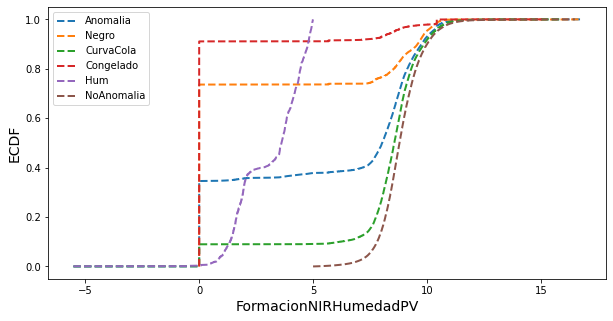

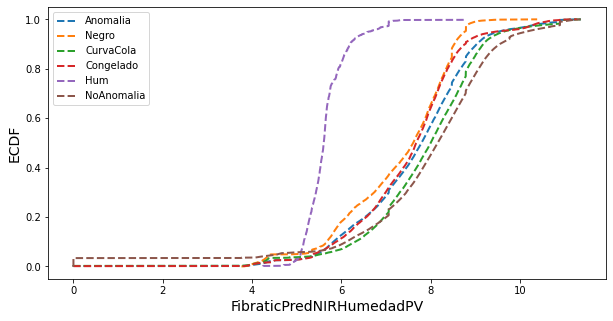

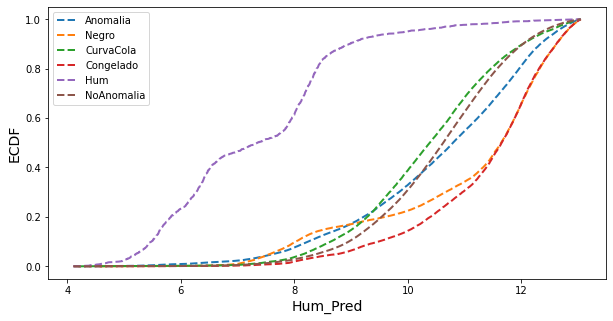

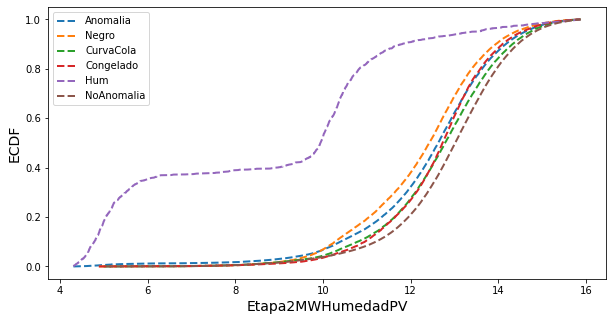

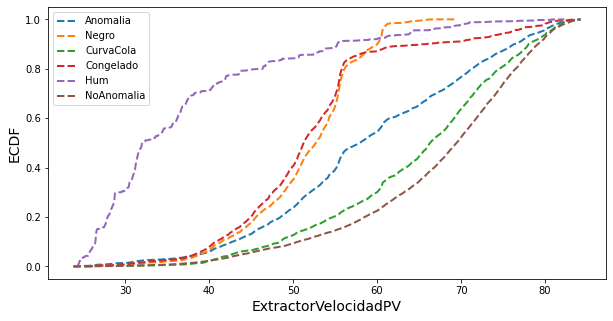

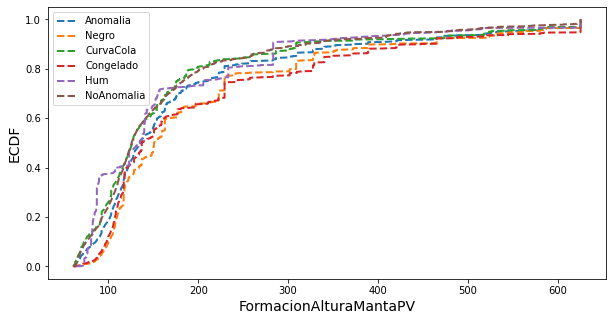

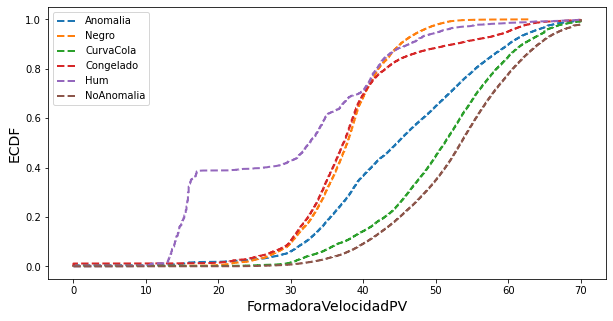

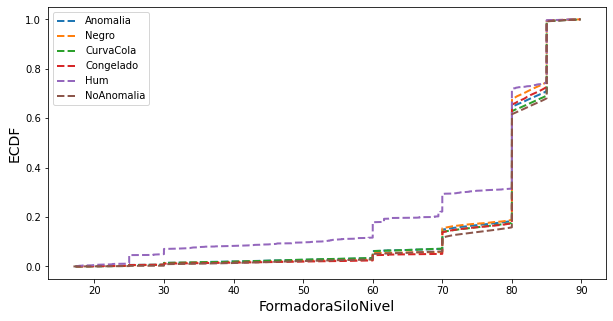

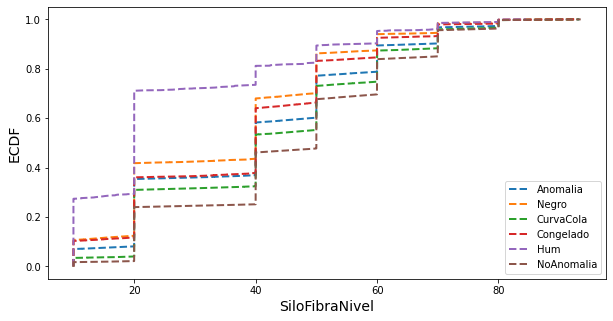

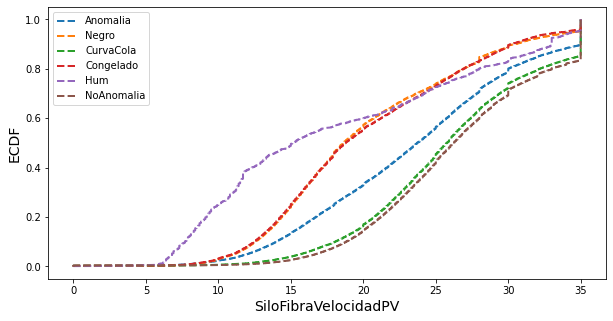

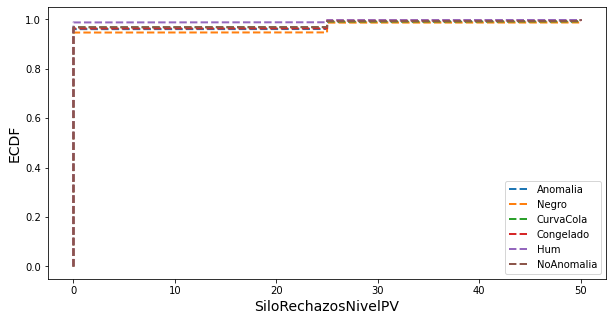

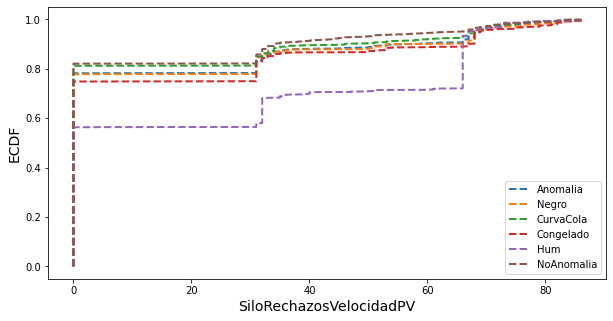

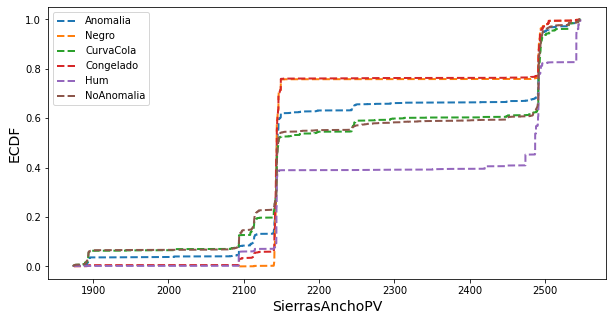

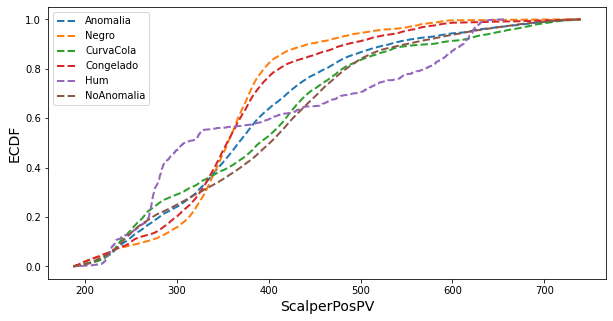

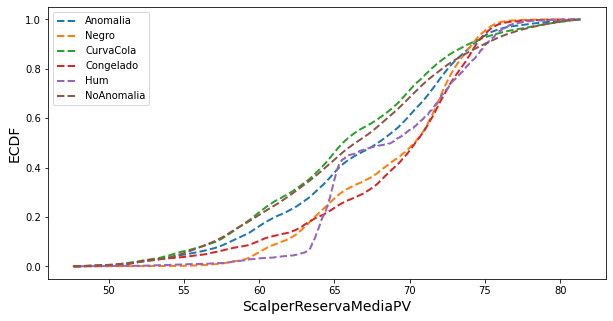

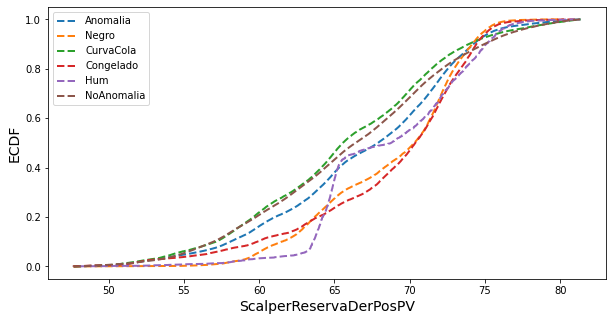

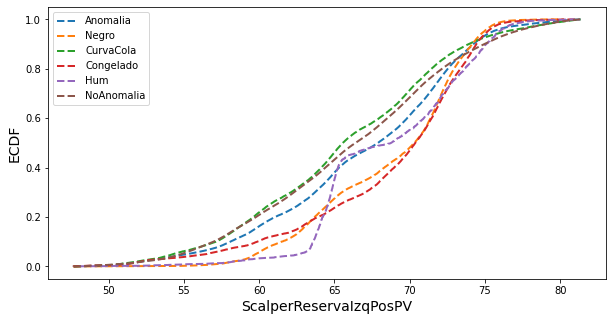

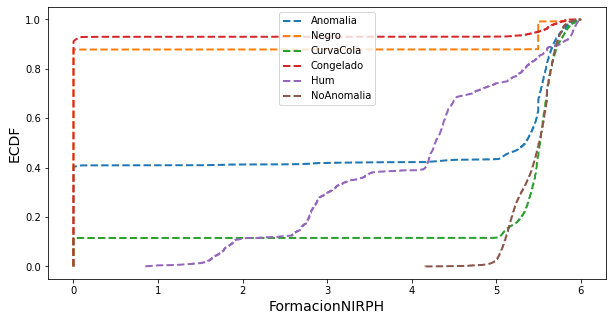

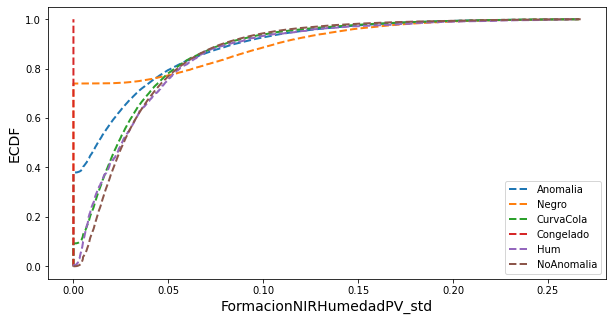

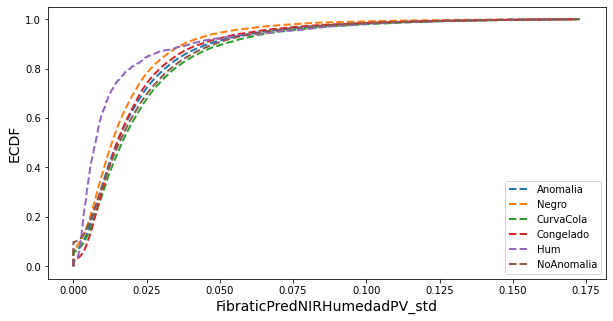

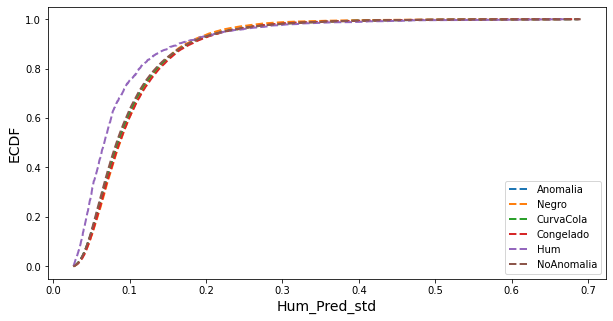

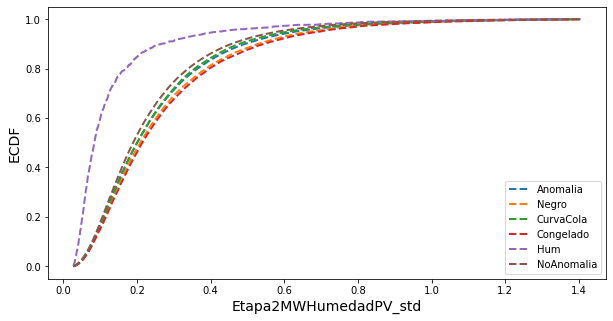

In [11]:
for atributo in columnas_iniciales:
    fig = plt.figure(figsize=(10,5))
    for i in lista_anomalias:
        x,y = dcst.ecdf(df[df[i]==1][atributo])
        plt.plot(x,y, linestyle='--', lw = 2, label=i)

    x,y = dcst.ecdf(df[df['Anomalia']==0][atributo])
    plt.plot(x,y, linestyle='--', lw = 2, label='NoAnomalia')
    plt.legend()
    plt.xlabel(atributo, size = 14)
    plt.ylabel('ECDF', size = 14)
    plt.show()

# Extracciones

C:\Users\marco\AppData\Local\Temp\ipykernel_6780\541143934.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


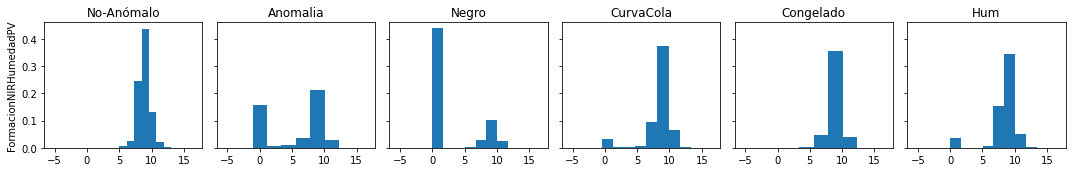

In [12]:
date_form = DateFormatter("%b")
fig,ax = plt.subplots(nrows = 1, ncols = len(lista_anomalias)+1, figsize=(15,2.5), sharey='row', sharex='row')

ax[0].set_title('No-Anómalo')
for i in range(len(lista_anomalias)):
    ax[i+1].set_title(lista_anomalias[i])


df0.iloc[:,0].hist(ax=ax[0], grid=False, density=1)
df_Anomalia.iloc[:,0].hist(ax=ax[1], grid=False, density=1)
df_Negro.iloc[:,0].hist(ax=ax[2], grid=False, density=1)
df_CurvaCola.iloc[:,0].hist(ax=ax[3], grid=False, density=1)
df_Congelado.iloc[:,0].hist(ax=ax[4], grid=False, density=1)
df_Hum.iloc[:,0].hist(ax=ax[5], grid=False, density=1)

ax[0].set_ylabel('FormacionNIRHumedadPV')

fig.tight_layout()
fig.show()

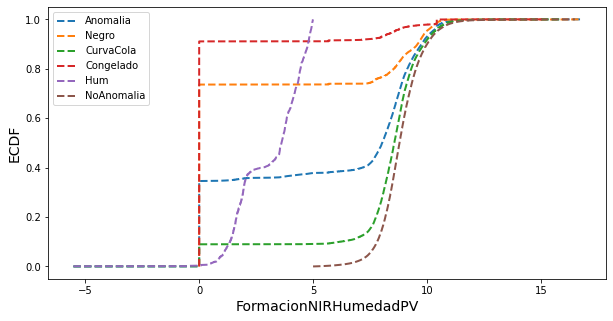

In [13]:
fig = plt.figure(figsize=(10,5))
for i in lista_anomalias:
    x,y = dcst.ecdf(df[df[i]==1]['FormacionNIRHumedadPV'])
    plt.plot(x,y, linestyle='--', lw = 2, label=i)

x,y = dcst.ecdf(df[df['Anomalia']==0]['FormacionNIRHumedadPV'])
plt.plot(x,y, linestyle='--', lw = 2, label='NoAnomalia')
plt.legend()
plt.xlabel('FormacionNIRHumedadPV', size = 14)
plt.ylabel('ECDF', size = 14)
plt.show()